In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read the csv
df_final = pd.read_csv('final_projects_results.csv')
df_evol = pd.read_csv('evolution_time_results.csv')

df_final = df_final.loc[df_final['Abstraction'] != 'Wrong project']
df_evol = df_evol.loc[df_evol['Abstraction'] != 'Wrong project']

df_final.shape, df_evol.shape

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


((754, 24), (59916, 24))

### Bad Smells - Análisis General

In [67]:
list(df_evol.columns)

['Project',
 'Project id',
 'Project date',
 'Project hour',
 'Abstraction',
 'Parallelization',
 'Logic',
 'Synchronization',
 'FlowControl',
 'UserInteractivity',
 'DataRepresent.',
 'TotalMastery',
 'AverageMastery',
 'Level',
 'DefaultSpriteNames',
 'TotalDefaultNames',
 'DuplicateScripts',
 'TotalDupScripts',
 'DeadCode',
 'Total blocks DeadCode',
 'AttributeInitialization',
 'Total AttributeInitialization',
 'Block Count',
 'Total blocks']

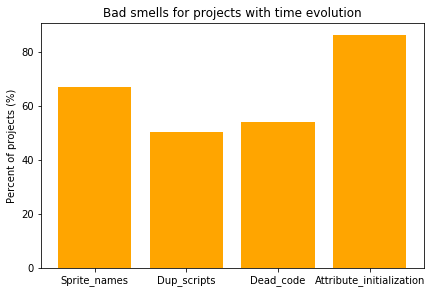

In [82]:
import matplotlib.pyplot as plt

sprite_names = 100*df_evol.loc[df_evol['TotalDefaultNames'] != 0].shape[0]/float(df_evol.shape[0])

dup_scripts = 100*df_evol.loc[df_evol['TotalDupScripts'] != 0].shape[0]/float(df_evol.shape[0])

dead_code = 100*df_evol.loc[df_evol['Total blocks DeadCode'] != 0].shape[0]/float(df_evol.shape[0])

attr_init = 100*df_evol.loc[df_evol['Total AttributeInitialization'] != 0].shape[0]/float(df_evol.shape[0])

general_data = [sprite_names, dup_scripts, dead_code, attr_init]


labels = ['Sprite_names', 'Dup_scripts', 'Dead_code', 'Attribute_initialization']


plt.bar(labels, general_data, color='orange')
plt.tight_layout()
plt.title('Bad smells for projects with time evolution')
plt.ylabel('Percent of projects (%)')
plt.show()


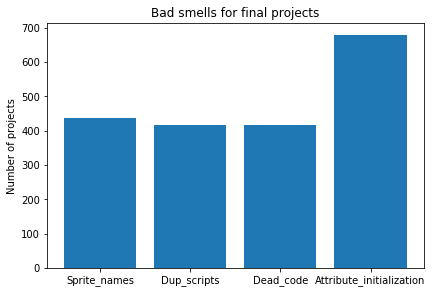

In [28]:
sprite_names = df_final.loc[df_final['TotalDefaultNames'] != 0].shape[0]

dup_scripts = df_final.loc[df_final['TotalDupScripts'] != 0].shape[0]

dead_code = df_final.loc[df_final['Total blocks DeadCode'] != 0].shape[0]

attr_init = df_final.loc[df_final['Total AttributeInitialization'] != 0].shape[0]

data = [sprite_names, dup_scripts, dead_code, attr_init]

labels = ['Sprite_names', 'Dup_scripts', 'Dead_code', 'Attribute_initialization']

plt.bar(labels, data)
plt.tight_layout()
plt.title('Bad smells for final projects')
plt.ylabel('Number of projects')
plt.show()


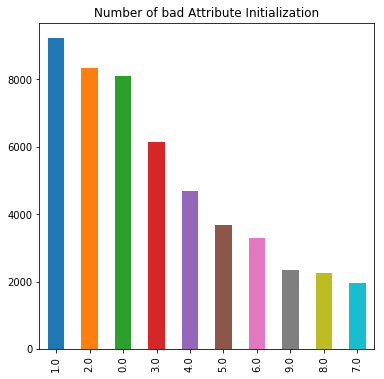

In [39]:
df_evol['Total AttributeInitialization'].value_counts().nlargest(10).plot(kind='bar',
                                                                          figsize=(6,6),
                                                                          title='Number of bad Attribute Initialization')


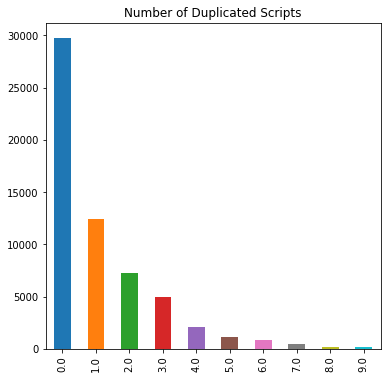

In [28]:
df_evol['TotalDupScripts'].value_counts().nlargest(10).plot(kind='bar', figsize=(6,6),
                                                                          title='Number of Duplicated Scripts')

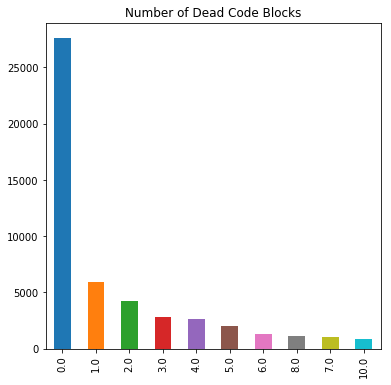

In [30]:
df_evol['Total blocks DeadCode'].value_counts().nlargest(10).plot(kind='bar',  
                                                                          figsize=(6,6),
                                                                          title='Number of Dead Code Blocks')

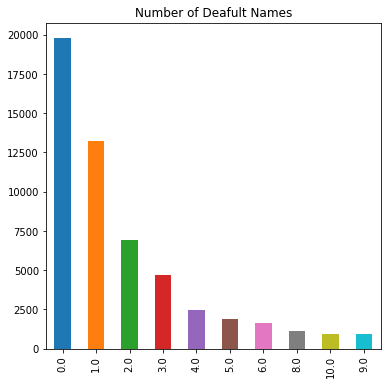

In [32]:
df_evol['TotalDefaultNames'].value_counts().nlargest(10).plot(kind='bar',
                                                                          figsize=(6,6),
                                                                          title='Number of Deafult Names')

### Bad smells and total mastery

In [163]:
list(df_final.columns)

['Project',
 'Project id',
 'Project date',
 'Project hour',
 'Abstraction',
 'Parallelization',
 'Logic',
 'Synchronization',
 'FlowControl',
 'UserInteractivity',
 'DataRepresent.',
 'TotalMastery',
 'AverageMastery',
 'Level',
 'DefaultSpriteNames',
 'TotalDefaultNames',
 'DuplicateScripts',
 'TotalDupScripts',
 'DeadCode',
 'Total blocks DeadCode',
 'AttributeInitialization',
 'Total AttributeInitialization',
 'Block Count',
 'Total blocks']

Text(0,0.5,'Total Default Names')

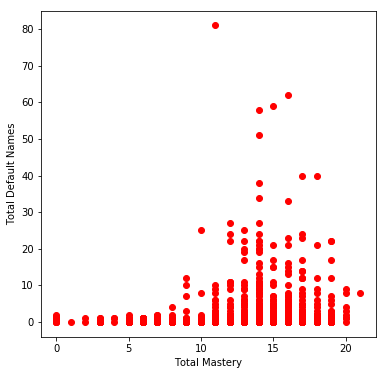

In [218]:
plt.subplots(figsize=(6, 6))

plt.plot(df_final['TotalMastery'], df_final['TotalDefaultNames'], 'ro')
plt.xlabel('Total Mastery')
plt.ylabel('Total Default Names')


Text(0,0.5,'Total Dead Code Blocks')

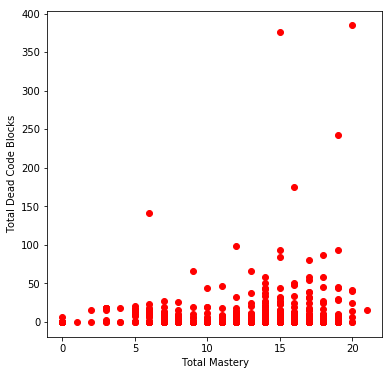

In [219]:
plt.subplots(figsize=(6, 6))

plt.plot(df_final['TotalMastery'], df_final['Total blocks DeadCode'], 'ro')
plt.xlabel('Total Mastery')
plt.ylabel('Total Dead Code Blocks')

Text(0,0.5,'Total Duplicated Scripts')

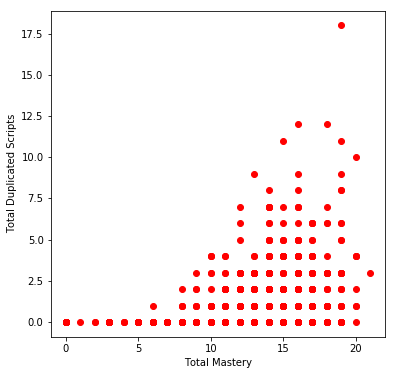

In [220]:
plt.subplots(figsize=(6, 6))

plt.plot(df_final['TotalMastery'], df_final['TotalDupScripts'], 'ro')
plt.xlabel('Total Mastery')
plt.ylabel('Total Duplicated Scripts')

Text(0,0.5,'Total Bad Attribute Initialization')

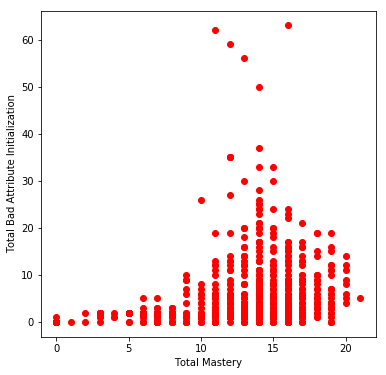

In [221]:
plt.subplots(figsize=(6, 6))

plt.plot(df_final['TotalMastery'], df_final['Total AttributeInitialization'], 'ro')
plt.xlabel('Total Mastery')
plt.ylabel('Total Bad Attribute Initialization')

Conclusiones

- Los bad smells aumentan TODOS con el aumento de la puntuación total.
- Los bad smells aumentan con el paso del TIEMPO.
- Bloques de código muerto es el bad smell que más aumenta.
- AttributeInitialization es el bad smell más habitual.

### Preguntas de análisis

#### 1. ¿Tienen más o menos TotalMastery los proyectos con bad smells comparados con los que no tienen bad smells?

Proyectos sin bad smells:  1.59151193634 % ( 12 )
Proyectos con bad smells:  98.4084880637 % ( 742 )


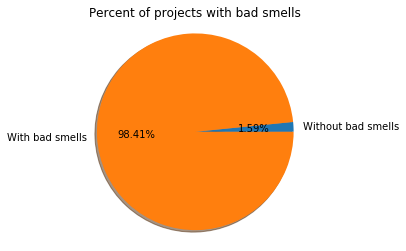

In [14]:
df_correct =  df_final.loc[(df_final['TotalDefaultNames'] == 0.0) &
             (df_final['TotalDupScripts'] == 0.0) &
             (df_final['Total blocks DeadCode'] == 0.0) &
             (df_final['Total AttributeInitialization'] == 0.0)]


df_badsmell = pd.concat([df_final, df_correct]).drop_duplicates(keep=False)

percent_nobadsmells = 100*df_correct.shape[0]/float(df_final.shape[0])
percent_yesbadsmells = 100*df_badsmell.shape[0]/float(df_final.shape[0])

print "Proyectos sin bad smells: ", percent_nobadsmells, "% (" ,df_correct.shape[0], ")"
print "Proyectos con bad smells: ", percent_yesbadsmells, "% (" ,df_badsmell.shape[0], ")"

labels = ["Without bad smells", "With bad smells"]
plt.pie([percent_nobadsmells, percent_yesbadsmells], labels=labels, autopct='%.2f%%', shadow=True)
plt.axis('equal') 
plt.title('Percent of projects with bad smells')
plt.show()


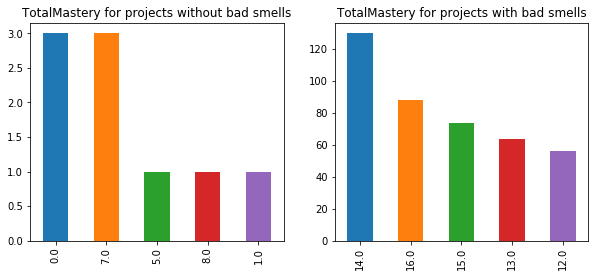

In [15]:
fig, axs = plt.subplots(1,2)

df_correct['TotalMastery'].value_counts().nlargest(5).plot(ax=axs[0], kind='bar', figsize=(10,4),
                                                           title='TotalMastery for projects without bad smells')




df_badsmell['TotalMastery'].value_counts().nlargest(5).plot(ax=axs[1], kind='bar', figsize=(10,4), 
                                                           title='TotalMastery for projects with bad smells')



Proyectos sin bad smells:  2.92743173777 % ( 1754 )
Proyectos con bad smells:  97.0725682622 % ( 58162 )


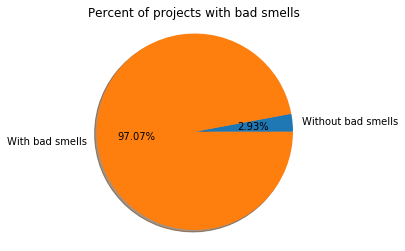

In [16]:
df_correct =  df_evol.loc[(df_evol['TotalDefaultNames'] == 0.0) &
             (df_evol['TotalDupScripts'] == 0.0) &
             (df_evol['Total blocks DeadCode'] == 0.0) &
             (df_evol['Total AttributeInitialization'] == 0.0)]


df_badsmell = pd.concat([df_evol, df_correct]).drop_duplicates(keep=False)

print "Proyectos sin bad smells: ",100*df_correct.shape[0]/float(df_evol.shape[0]),"% (",df_correct.shape[0],")"
print "Proyectos con bad smells: ",100*df_badsmell.shape[0]/float(df_evol.shape[0]),"% (",df_badsmell.shape[0],")" 

percent_nobadsmells = 100*df_correct.shape[0]/float(df_evol.shape[0])
percent_yesbadsmells = 100*df_badsmell.shape[0]/float(df_evol.shape[0])

labels = ["Without bad smells", "With bad smells"]
plt.pie([percent_nobadsmells, percent_yesbadsmells], labels=labels, autopct='%.2f%%', shadow=True)
plt.axis('equal') 
plt.title('Percent of projects with bad smells')
plt.show()

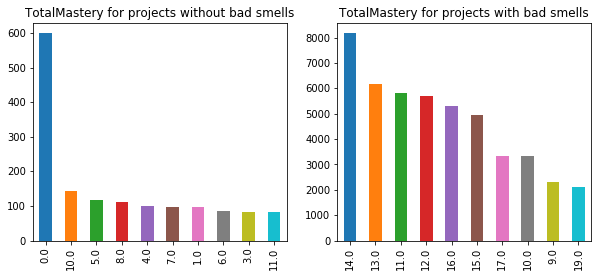

In [21]:
fig, axs = plt.subplots(1,2)

df_correct['TotalMastery'].value_counts().nlargest(10).plot(ax=axs[0], kind='bar',  
                                                           figsize=(10,4),
                                                           title='TotalMastery for projects without bad smells')


df_badsmell['TotalMastery'].value_counts().nlargest(10).plot(ax=axs[1], kind='bar', 
                                                           figsize=(10,4),
                                                           title='TotalMastery for projects with bad smells')





Conclusiones:

- El porcentaje de proyectos sin bad smells es muy pequeño.
- Más del 50% de proyectos que no tienen bad smells es porque no tienen bloques, con un TotalMastery de 0 puntos.
- Los proyectos con bad smells tienen más puntuación de media.

#### 2. ¿Se comportan igual los bad smell?


In [210]:
df_evol['Project id'].value_counts()


213692969    597
213497977    596
215468847    535
216061381    448
209427643    435
165069525    375
209520961    355
129565552    344
129217127    328
212047693    321
210505904    320
210198043    292
209392372    291
215908750    286
129565728    279
213264335    277
212582972    276
213802560    269
211023152    269
209464637    267
129174445    267
213257497    266
129175558    257
129135793    253
129136551    251
165094130    250
209392926    249
128884245    249
213854902    249
213689745    248
            ... 
142220593      1
143820853      1
142214834      1
142005033      1
142617590      1
142791785      1
145462833      1
143396016      1
142607460      1
142732632      1
143168002      1
143371546      1
147872654      1
142620265      1
183813975      1
143180040      1
143378761      1
125075808      1
143364578      1
125076128      1
125097086      1
143170691      1
142224821      1
144277483      1
183502416      1
183107183      1
142792810      1
183009569     

(108, 24)

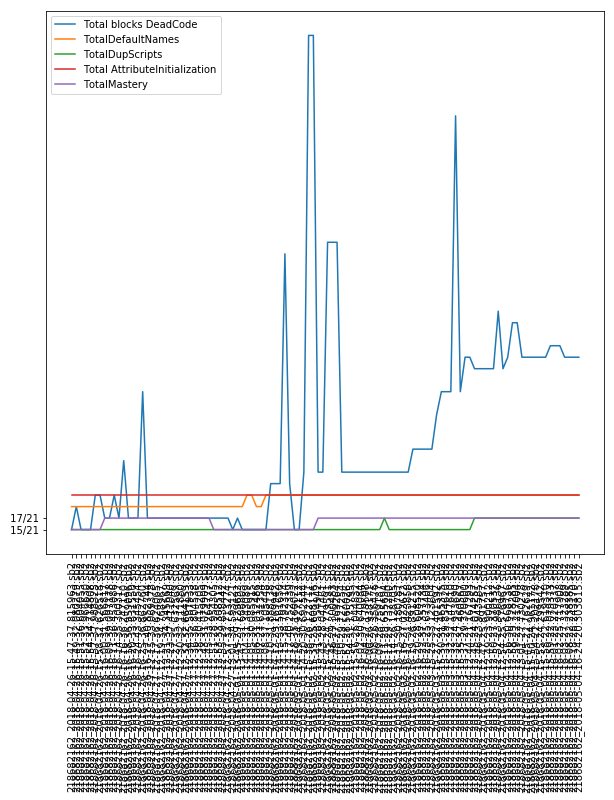

In [211]:
df_project = df_evol.loc[df_evol['Project id'] == 218682162]

df_project = df_project.sort_values(by=['Project date', 'Project hour'])


fig, axs = plt.subplots(figsize=(10, 10))

plt.plot(df_project['Project'], df_project['Total blocks DeadCode'])
plt.plot(df_project['Project'], df_project['TotalDefaultNames'])
plt.plot(df_project['Project'], df_project['TotalDupScripts'])
plt.plot(df_project['Project'], df_project['Total AttributeInitialization'])
plt.plot(df_project['Project'], df_project['TotalMastery'])

plt.xticks(rotation='vertical')

axs.legend(loc='upper left', frameon=True)

df_project.shape


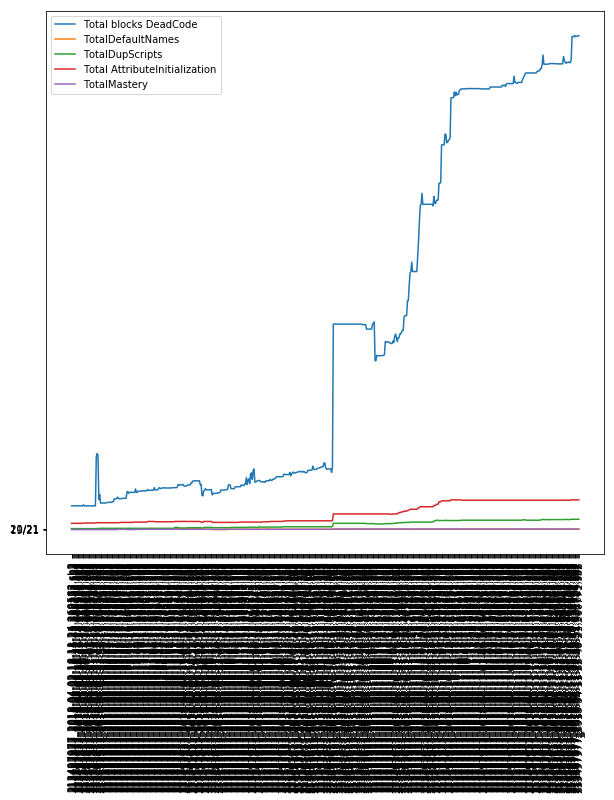

In [159]:
df_project = df_evol.loc[df_evol['Project id'] == 213497977]

df_project = df_project.sort_values(by=['Project date', 'Project hour'])

df_project = df_project['TotalMastery'].dropna()


fig, axs = plt.subplots(figsize=(10, 10))

plt.plot(df_project['Project'], df_project['Total blocks DeadCode'])
plt.plot(df_project['Project'], df_project['TotalDefaultNames'])
plt.plot(df_project['Project'], df_project['TotalDupScripts'])
plt.plot(df_project['Project'], df_project['Total AttributeInitialization'])
plt.plot(df_project['Project'], df_project['TotalMastery'])

plt.xticks(rotation='vertical')

axs.legend(loc='upper left', frameon=True)




Conclusiones:

- No todos los bad smell se comportan de la misma manera.
- Los bloques de código repetido son los que más variabilidad presentan. Además aumentan en función del número de bloques usados.

#### 3. ¿Tienen más bloques los proyectos que tienen más bad smells?

Bad smells / Num blocks

In [71]:
list(df_final.columns)

['Project',
 'Project id',
 'Project date',
 'Project hour',
 'Abstraction',
 'Parallelization',
 'Logic',
 'Synchronization',
 'FlowControl',
 'UserInteractivity',
 'DataRepresent.',
 'TotalMastery',
 'AverageMastery',
 'Level',
 'DefaultSpriteNames',
 'TotalDefaultNames',
 'DuplicateScripts',
 'TotalDupScripts',
 'DeadCode',
 'Total blocks DeadCode',
 'AttributeInitialization',
 'Total AttributeInitialization',
 'Block Count',
 'Total blocks']

In [143]:

# fig, axs = plt.subplots(2,2, figsize=(12,12))

# axs[0,0].plot(df_final['Total blocks'], df_final['Total AttributeInitialization'], 'ro')
# axs[0,1].plot(df_final['Total blocks'], df_final['Total blocks DeadCode'], 'ro')
# axs[1,0].plot(df_final['Total blocks'], df_final['TotalDupScripts'], 'ro')
# axs[1,1].plot(df_final['Total blocks'], df_final['TotalDefaultNames'], 'ro')

# # axs.set(xlabel='Number of blocks for the analysis')
# axs[0,0].set_ylabel= 'Total Attribute Initialization'
# axs[0,1].set_ylabel= 'Total Blocks Dead Code'
# axs[1,0].set_ylabel= 'Total Duplicated Scripts'
# axs[1,1].set_ylabel= 'Total Default Names'

# df_evol['TotalMastery'].sort_values(by=df_evol['TotalMastery'])#.value_counts().plot(kind='bar',title = 'Number of bad Attribute Initialization')
# 

df_test = df_evol.loc[df_evol['TotalMastery'] == 15]


df_test[['TotalDupScripts', 'Total blocks']]

,TotalDupScripts,Total blocks
668,1.0,135
670,2.0,194
672,2.0,191
678,2.0,187
682,1.0,139
687,2.0,123
689,2.0,193
696,2.0,127
697,2.0,138
699,2.0,208


Conclusiones:

- No parece que a medida que se usen más bloques, aparezcan más bad smells. 
- Los bad smells están presentes desde que se utilizan pocos bloques.

#### 4. Los proyectos que presentan un bad smell, ¿tienen de otros tipos? ¿Están relacionados?

In [125]:
df_final[['TotalDefaultNames','Total blocks DeadCode','TotalDupScripts','Total AttributeInitialization']].corr()

,TotalDefaultNames,Total blocks DeadCode,TotalDupScripts,Total AttributeInitialization
TotalDefaultNames,1.000000,-0.007719,0.247767,0.461125
Total blocks DeadCode,-0.007719,1.000000,0.099924,0.016554
TotalDupScripts,0.247767,0.099924,1.000000,0.281553
Total AttributeInitialization,0.461125,0.016554,0.281553,1.000000


In [8]:
only_defaultnames = df_evol.loc[(df_evol['TotalDefaultNames'] != 0.0) & 
                                  (df_evol['TotalDupScripts'] == 0.0) &
                                  (df_evol['Total blocks DeadCode'] == 0.0) & 
                                  (df_evol['Total AttributeInitialization'] == 0.0)]

only_dupscripts = df_evol.loc[(df_evol['TotalDefaultNames'] == 0.0) & 
                                  (df_evol['TotalDupScripts'] != 0.0) &
                                  (df_evol['Total blocks DeadCode'] == 0.0) & 
                                  (df_evol['Total AttributeInitialization'] == 0.0)]

only_deadcode = df_evol.loc[(df_evol['TotalDefaultNames'] == 0.0) & 
                                  (df_evol['TotalDupScripts'] == 0.0) &
                                  (df_evol['Total blocks DeadCode'] != 0.0) & 
                                  (df_evol['Total AttributeInitialization'] == 0.0)]

only_attinitializ = df_evol.loc[(df_evol['TotalDefaultNames'] == 0.0) & 
                                  (df_evol['TotalDupScripts'] == 0.0) &
                                  (df_evol['Total blocks DeadCode'] == 0.0) & 
                                  (df_evol['Total AttributeInitialization'] != 0.0)]


data = [['Default Names', only_defaultnames.shape[0]], ['Dup Scripts', only_dupscripts.shape[0]],
        ['Dead Code', only_deadcode.shape[0]], ['Attribute Initialization', only_attinitializ.shape[0]]]

pd.DataFrame(data=data, columns=['Bad Smell', 'Total'])


,Bad Smell,Total
0,Default Names,2880
1,Dup Scripts,444
2,Dead Code,564
3,Attribute Initialization,4306


#### 5. ¿Cuándo aparece el primer bad smell? ¿Desaparecen?

In [99]:
df_correct['Project id'].value_counts()

212066984    76
209397342    59
165069525    56
129496171    45
213802560    35
218171128    33
212086177    32
126845274    30
212582972    29
213263614    29
209520961    28
212568239    28
212568185    28
212063189    27
212585806    26
183021117    23
182431520    23
129532331    23
212049312    22
183830596    21
130160517    21
209453883    21
129506444    20
213690592    20
213212934    20
165050854    20
210533073    20
213860519    19
212570711    18
213257497    18
             ..
215466926     2
213256978     2
213639701     2
212581771     2
218171483     1
216049586     1
215453615     1
142774166     1
218636262     1
210210873     1
142214834     1
183502472     1
183107183     1
183006787     1
145462833     1
213223641     1
212086035     1
213639656     1
218170610     1
213214439     1
183575766     1
210529326     1
183009569     1
216103839     1
208966547     1
215798662     1
144270188     1
213854902     1
183093625     1
129107977     1
Name: Project id, Length

(198, 24)

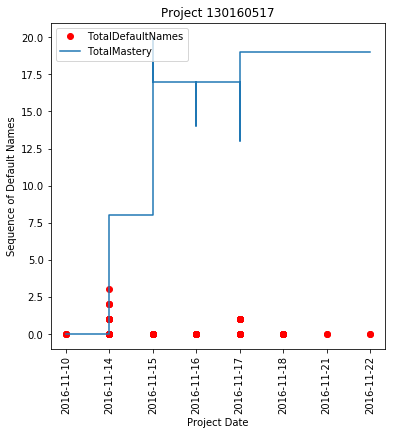

In [97]:
df_project = df_evol.loc[df_evol['Project id'] == 130160517].sort_values(by=['Project date', 'Project hour'])

plt.subplots(figsize=(6, 6))

plt.plot(df_project['Project date'], df_project['TotalDefaultNames'], 'ro')
plt.plot(df_project['Project date'], df_project['TotalMastery'])

plt.xlabel('Project Date')
plt.ylabel('Sequence of Default Names')
plt.title('Project 130160517')

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')

df_project.shape

(219, 24)

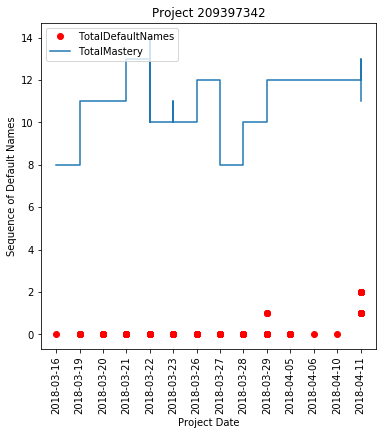

In [96]:
df_project = df_evol.loc[df_evol['Project id'] == 209397342].sort_values(by=['Project date', 'Project hour'])

plt.subplots(figsize=(6, 6))

plt.plot(df_project['Project date'], df_project['TotalDefaultNames'], 'ro')
plt.plot(df_project['Project date'], df_project['TotalMastery'])

plt.xlabel('Project Date')
plt.ylabel('Sequence of Default Names')
plt.title('Project 209397342')

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')

df_project.shape

(204, 24)

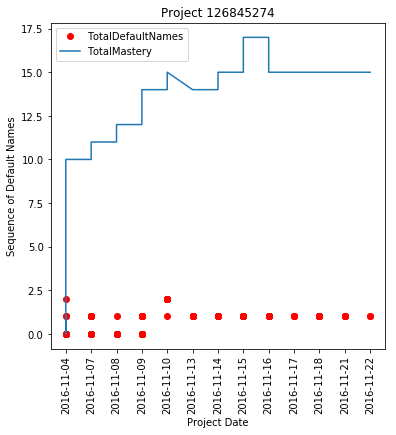

In [98]:
df_project = df_evol.loc[df_evol['Project id'] == 126845274].sort_values(by=['Project date', 'Project hour'])

plt.subplots(figsize=(6, 6))

plt.plot(df_project['Project date'], df_project['TotalDefaultNames'], 'ro')
plt.plot(df_project['Project date'], df_project['TotalMastery'])

plt.xlabel('Project Date')
plt.ylabel('Sequence of Default Names')
plt.title('Project 126845274')

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')

df_project.shape

(375, 24)

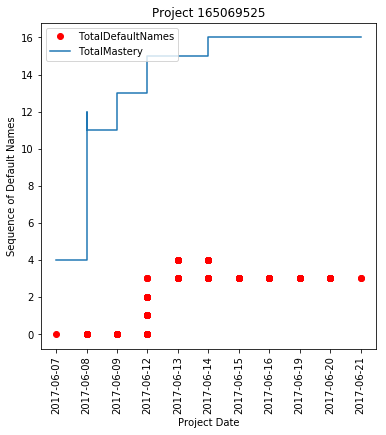

In [105]:
df_project = df_evol.loc[df_evol['Project id'] == 165069525].sort_values(by=['Project date', 'Project hour'])

plt.subplots(figsize=(6, 6))

plt.plot(df_project['Project date'], df_project['TotalDefaultNames'], 'ro')
plt.plot(df_project['Project date'], df_project['TotalMastery'])

plt.xlabel('Project Date')
plt.ylabel('Sequence of Default Names')
plt.title('Project 165069525')

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')

df_project.shape

(198, 24)

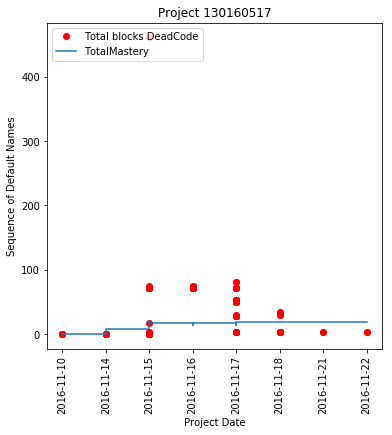

In [104]:
df_project = df_evol.loc[df_evol['Project id'] == 130160517].sort_values(by=['Project date', 'Project hour'])

plt.subplots(figsize=(6, 6))

plt.plot(df_project['Project date'], df_project['Total blocks DeadCode'], 'ro')
plt.plot(df_project['Project date'], df_project['TotalMastery'])

plt.xlabel('Project Date')
plt.ylabel('Sequence of Dead Code')
plt.title('Project 130160517')

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')

df_project.shape

(219, 24)

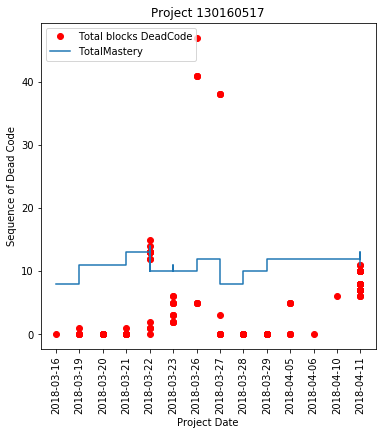

In [106]:
df_project = df_evol.loc[df_evol['Project id'] == 209397342].sort_values(by=['Project date', 'Project hour'])

plt.subplots(figsize=(6, 6))

plt.plot(df_project['Project date'], df_project['Total blocks DeadCode'], 'ro')
plt.plot(df_project['Project date'], df_project['TotalMastery'])

plt.xlabel('Project Date')
plt.ylabel('Sequence of Dead Code')
plt.title('Project 209397342')

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')

df_project.shape

(204, 24)

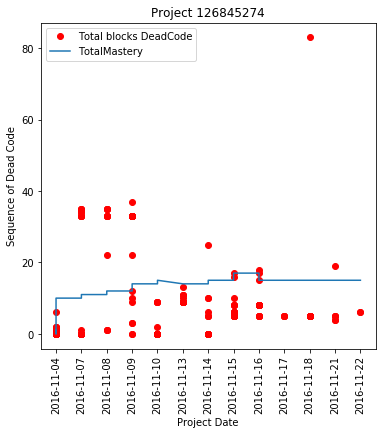

In [7]:
df_project = df_evol.loc[df_evol['Project id'] == 126845274].sort_values(by=['Project date', 'Project hour'])

plt.subplots(figsize=(6, 6))

plt.plot(df_project['Project date'], df_project['Total blocks DeadCode'], 'ro')
plt.plot(df_project['Project date'], df_project['TotalMastery'])

plt.xlabel('Project Date')
plt.ylabel('Sequence of Dead Code')
plt.title('Project 126845274')

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')

df_project.shape

(204, 24)

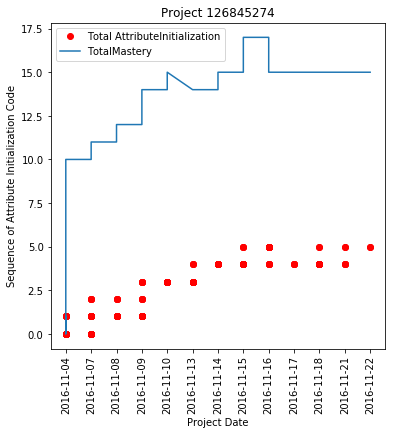

In [5]:

df_project = df_evol.loc[df_evol['Project id'] == 165069525].sort_values(by=['Project date', 'Project hour'])

plt.subplots(figsize=(6, 6))

plt.plot(df_project['Project date'], df_project['Total blocks DeadCode'], 'ro')
plt.plot(df_project['Project date'], df_project['TotalMastery'])

plt.xlabel('Project Date')
plt.ylabel('Sequence of Dead Code')
plt.title('Project 165069525')

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')

df_project.shape

(204, 24)

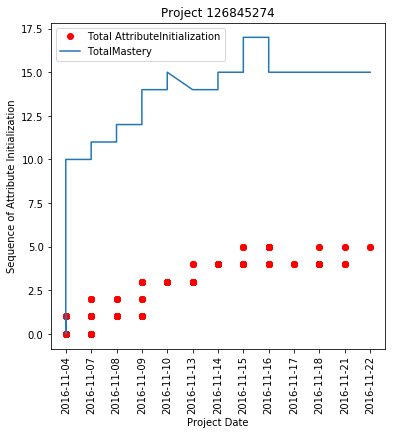

In [6]:

df_project = df_evol.loc[df_evol['Project id'] == 126845274].sort_values(by=['Project date', 'Project hour'])

plt.subplots(figsize=(6, 6))

plt.plot(df_project['Project date'], df_project['Total AttributeInitialization'], 'ro')
plt.plot(df_project['Project date'], df_project['TotalMastery'])

plt.xlabel('Project Date')
plt.ylabel('Sequence of Attribute Initialization')
plt.title('Project 126845274')

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')

df_project.shape

(375, 24)

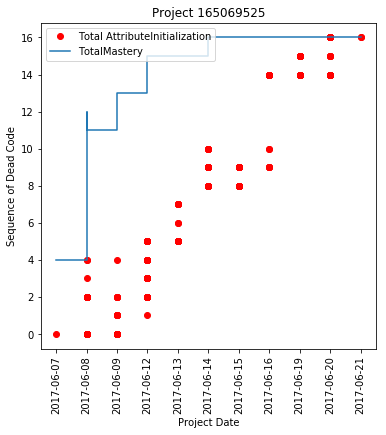

In [3]:

df_project = df_evol.loc[df_evol['Project id'] == 165069525].sort_values(by=['Project date', 'Project hour'])

plt.subplots(figsize=(6, 6))

plt.plot(df_project['Project date'], df_project['Total AttributeInitialization'], 'ro')
plt.plot(df_project['Project date'], df_project['TotalMastery'])

plt.xlabel('Project Date')
plt.ylabel('Sequence of Attribute Initialization')
plt.title('Project 165069525')

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')

df_project.shape

(375, 24)

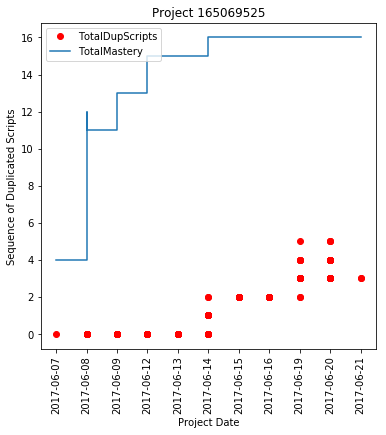

In [8]:

df_project = df_evol.loc[df_evol['Project id'] == 165069525].sort_values(by=['Project date', 'Project hour'])

plt.subplots(figsize=(6, 6))

plt.plot(df_project['Project date'], df_project['TotalDupScripts'], 'ro')
plt.plot(df_project['Project date'], df_project['TotalMastery'])

plt.xlabel('Project Date')
plt.ylabel('Sequence of Duplicated Scripts')
plt.title('Project 165069525')

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')

df_project.shape

(204, 24)

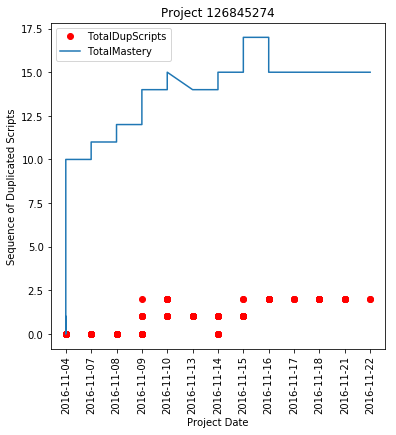

In [9]:

df_project = df_evol.loc[df_evol['Project id'] == 126845274].sort_values(by=['Project date', 'Project hour'])

plt.subplots(figsize=(6, 6))

plt.plot(df_project['Project date'], df_project['TotalDupScripts'], 'ro')
plt.plot(df_project['Project date'], df_project['TotalMastery'])

plt.xlabel('Project Date')
plt.ylabel('Sequence of Duplicated Scripts')
plt.title('Project 126845274')

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')

df_project.shape

6. Bad smells para perfiles avanzados

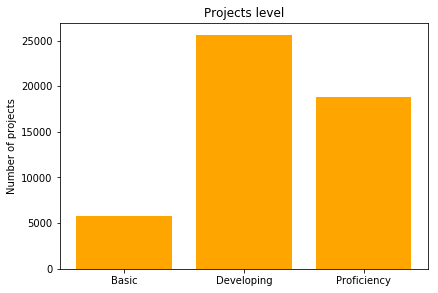

In [46]:
df_basic = df_evol.loc[df_evol['TotalMastery'] < 7]
df_develop = df_evol.loc[(df_evol['TotalMastery'] > 7) & (df_evol['TotalMastery'] < 14)]
df_prof = df_evol.loc[df_evol['TotalMastery'] > 14]

data = [df_basic.shape[0], df_develop.shape[0], df_prof.shape[0]]
labels = ['Basic', 'Developing', 'Proficiency']

plt.bar(labels, data, color='orange')
plt.tight_layout()
plt.title('Projects level')
plt.ylabel('Number of projects')
plt.show()

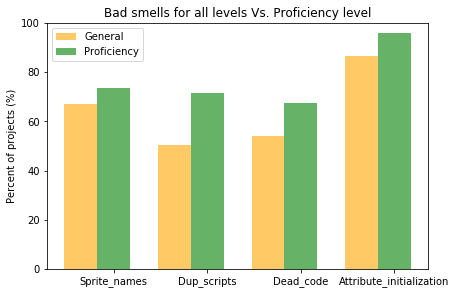

In [90]:

df_prof = df_evol.loc[df_evol['TotalMastery'] > 14]
df_prof.shape

sprite_names = 100*df_prof.loc[df_prof['TotalDefaultNames'] != 0].shape[0]/float(df_prof.shape[0])

dup_scripts = 100*df_prof.loc[df_prof['TotalDupScripts'] != 0].shape[0]/float(df_prof.shape[0])

dead_code = 100*df_prof.loc[df_prof['Total blocks DeadCode'] != 0].shape[0]/float(df_prof.shape[0])

attr_init = 100*df_prof.loc[df_prof['Total AttributeInitialization'] != 0].shape[0]/float(df_prof.shape[0])

data = [sprite_names, dup_scripts, dead_code, attr_init]

labels = ['Sprite_names', 'Dup_scripts', 'Dead_code', 'Attribute_initialization']


index = np.arange(4)

plt.bar(index, general_data, alpha=0.6, width=0.35, color='orange', label='General')
plt.bar(index + 0.35, data, alpha=0.6, width=0.35, color='g', label='Proficiency')

plt.tight_layout()
plt.ylabel('Percent of projects (%)')
plt.title('Bad smells for all levels Vs. Proficiency level')
plt.legend()
plt.xticks(index + 0.35, labels)
plt.ylim(0,100)
plt.show()



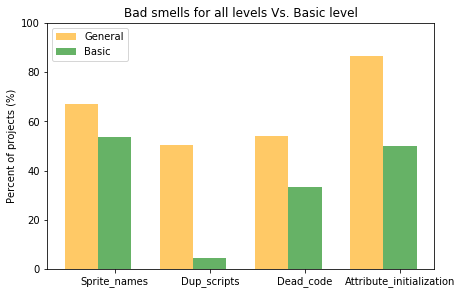

In [96]:

df_basic = df_evol.loc[df_evol['TotalMastery'] < 8]

sprite_names = 100*df_basic.loc[df_basic['TotalDefaultNames'] != 0].shape[0]/float(df_basic.shape[0])

dup_scripts = 100*df_basic.loc[df_basic['TotalDupScripts'] != 0].shape[0]/float(df_basic.shape[0])

dead_code = 100*df_basic.loc[df_basic['Total blocks DeadCode'] != 0].shape[0]/float(df_basic.shape[0])

attr_init = 100*df_basic.loc[df_basic['Total AttributeInitialization'] != 0].shape[0]/float(df_basic.shape[0])

data = [sprite_names, dup_scripts, dead_code, attr_init]

labels = ['Sprite_names', 'Dup_scripts', 'Dead_code', 'Attribute_initialization']


index = np.arange(4)

plt.bar(index, general_data, alpha=0.6, width=0.35, color='orange', label='General')
plt.bar(index + 0.35, data, alpha=0.6, width=0.35, color='g', label='Basic')

plt.tight_layout()
plt.ylabel('Percent of projects (%)')
plt.title('Bad smells for all levels Vs. Basic level')
plt.legend()
plt.xticks(index + 0.35, labels)
plt.ylim(0,100)
plt.show()



#### Bad smells / NumBlocks 